In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Load Data 

In [2]:
full_data = pd.read_csv('weight-height.csv')
full_data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [21]:
full_data.shape

(10000, 3)

In [3]:
full_data.shape
print(full_data.isnull().sum())

Gender    0
Height    0
Weight    0
dtype: int64


In [4]:
full_data.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

### Convert Categorical data to Numerical 

In [5]:
full_data['Gender'].replace(['Male','Female'], [0,1] , inplace = True) # convert gender to 0 and 1

C:\Users\dell\AppData\Local\Temp\ipykernel_3248\3216326737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['Gender'].replace(['Male','Female'], [0,1] , inplace = True) # convert gender to 0 and 1
C:\Users\dell\AppData\Local\Temp\ipykernel_3248\3216326737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [6]:
full_data

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


### Spliting Data for Training the Model

In [7]:
X = full_data.drop('Weight', axis = 1) # drop the target variable
y = full_data['Weight'] # store the target variable

In [8]:
X.shape

(10000, 2)

In [9]:
y.shape

(10000,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

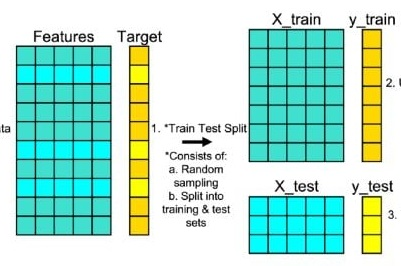

In [11]:
X_train.shape # training data

(8000, 2)

In [12]:
y_train.shape # training the model through target variable

(8000,)

In [13]:
X_test.shape # testing data

(2000, 2)

In [14]:
y_test.shape

(2000,)

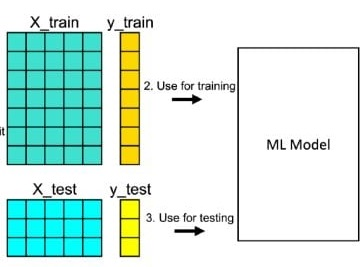

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

## Model Testing

### Model Predication

In [16]:
y_pred = lin_reg.predict(X_test)
print(y_pred)
print("Shape : --> ", y_pred.shape)

[167.79724358 130.22372931 143.21944069 ... 194.30169446 139.79411018
 198.49766984]
Shape : -->  (2000,)


### Here Comparsion of Actual value and Predicted values

In [17]:
results = np.column_stack((y_test,y_pred))

print("Actual Values | Predicted Values")
print("---------------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} | {predicted:12.2f} ")


Actual Values | Predicted Values
---------------------------------
        163.63 |       167.80 
        141.72 |       130.22 
        147.36 |       143.22 
        151.28 |       138.36 
        177.99 |       172.49 
        103.68 |       117.89 
        106.07 |       105.93 
        110.58 |       137.23 
        167.96 |       171.17 
        203.05 |       205.46 
        211.72 |       190.99 
        133.71 |       126.11 
        131.52 |       123.30 
        108.03 |       123.41 
        153.88 |       144.10 
        144.26 |       135.76 
        137.84 |       138.60 
        158.41 |       145.26 
        140.40 |       143.31 
        137.18 |       146.08 
        182.61 |       175.78 
        169.43 |       181.14 
        132.18 |       132.89 
        159.09 |       163.32 
        184.29 |       182.31 
        164.72 |       186.75 
        196.06 |       199.95 
        135.08 |       116.98 
        128.96 |       126.45 
        119.68 |       141.15 
   

<function matplotlib.pyplot.show(close=None, block=None)>

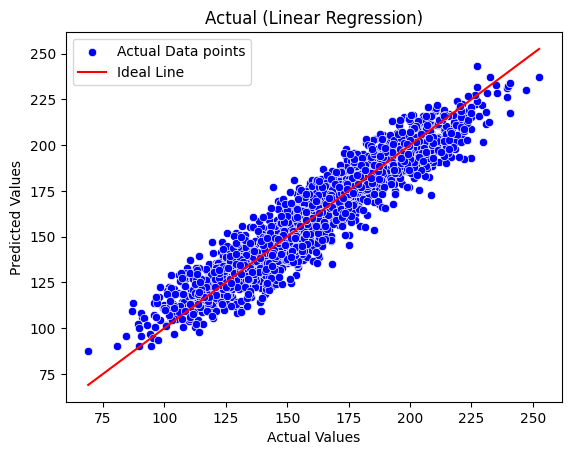

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.scatterplot(x=y_test, y= y_pred, color= 'blue', label= 'Actual Data points')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red', label= 'Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show

## Model Evalution
Loss Function --> MSE 

In [19]:
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
print('=='*30)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error :',mse)
print('Root Mean Squared Error :',rmse)

Linear Regression Model
Mean Squared Error : 103.3081031963646
Root Mean Squared Error : 10.164059385716152
